In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Sales_Revenue_Analytics_1000_Rows.csv")

df.head()


,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit
0,1,2022-01-01,Headphones,Central,1303,1,28982,28982,14766.999342,14215.000658
1,2,2022-01-02,Smartwatch,West,1068,3,9671,29013,18191.166761,10821.833239
2,3,2022-01-03,Tablet,East,1360,5,35719,178595,93828.386110,84766.613890
3,4,2022-01-04,Smartwatch,North,1601,3,33896,101688,69356.715964,32331.284036
4,5,2022-01-05,Smartwatch,East,1957,3,43089,129267,98797.721256,30469.278744


In [158]:
df.info()
df.isnull().sum()
df.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     1000 non-null   int64  
 1   Order_Date   1000 non-null   object 
 2   Product      1000 non-null   object 
 3   Region       1000 non-null   object 
 4   Customer_ID  1000 non-null   int64  
 5   Units_Sold   1000 non-null   int64  
 6   Unit_Price   1000 non-null   int64  
 7   Revenue      1000 non-null   int64  
 8   Cost         1000 non-null   float64
 9   Profit       1000 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,1000,6,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2024-09-26,Laptop,Central,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,181,203,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,1501.038000,5.036000,25301.657000,126674.443000,81513.156648,45161.286352
std,288.819436,NaN,NaN,NaN,285.330489,2.594887,14169.927272,102943.526679,67522.400653,39528.230678
min,1.000000,NaN,NaN,NaN,1001.000000,1.000000,582.000000,582.000000,360.012276,196.834229
25%,250.750000,NaN,NaN,NaN,1252.750000,3.000000,13119.250000,41787.750000,27470.495357,13679.803345
50%,500.500000,NaN,NaN,NaN,1499.000000,5.000000,25485.500000,97113.500000,62985.044236,34087.166756
75%,750.250000,NaN,NaN,NaN,1742.250000,7.000000,37011.250000,188322.750000,119169.297244,66565.594568


In [159]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.to_period('Q')

df['Profit_Margin'] = df['Profit'] / df['Revenue']

In [160]:
df.head()

,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quarter,Profit_Margin
0,1,2022-01-01,Headphones,Central,1303,1,28982,28982,14766.999342,14215.000658,2022,1,2022Q1,0.490477
1,2,2022-01-02,Smartwatch,West,1068,3,9671,29013,18191.166761,10821.833239,2022,1,2022Q1,0.372999
2,3,2022-01-03,Tablet,East,1360,5,35719,178595,93828.386110,84766.613890,2022,1,2022Q1,0.474630
3,4,2022-01-04,Smartwatch,North,1601,3,33896,101688,69356.715964,32331.284036,2022,1,2022Q1,0.317946
4,5,2022-01-05,Smartwatch,East,1957,3,43089,129267,98797.721256,30469.278744,2022,1,2022Q1,0.235708


In [161]:
monthly = (
    df.groupby(df['Order_Date'].dt.to_period('M'))
      .agg({
          'Revenue': 'sum',
          'Profit': 'sum',
          'Units_Sold': 'sum'
      })
      .reset_index()
)
monthly['Order_Date'] = monthly['Order_Date'].dt.to_timestamp()

yearly = df.groupby('Year')[['Revenue','Profit','Units_Sold']].sum()
quarterly = df.groupby('Quarter')[['Revenue','Profit','Units_Sold']].sum()

display(monthly,yearly,quarterly)

,Order_Date,Revenue,Profit,Units_Sold
0,2022-01-01,4019257,1.327013e+06,153
1,2022-02-01,3749921,1.372271e+06,160
2,2022-03-01,4781633,1.754625e+06,165
3,2022-04-01,3632197,1.282999e+06,131
4,2022-05-01,4178297,1.389766e+06,175
5,2022-06-01,3060313,1.087876e+06,155
6,2022-07-01,3473951,1.185409e+06,156
7,2022-08-01,4029480,1.593608e+06,144
8,2022-09-01,3265604,1.145730e+06,150
9,2022-10-01,4525165,1.569040e+06,180


,Revenue,Profit,Units_Sold
Year,,,
2022,47400875,1.686085e+07,1893
2023,43326040,1.534833e+07,1740
2024,35947528,1.295211e+07,1403


,Revenue,Profit,Units_Sold
Quarter,,,
2022Q1,12550811,4.453909e+06,478
2022Q2,10870807,3.760641e+06,461
2022Q3,10769035,3.924748e+06,450
2022Q4,13210222,4.721548e+06,504
2023Q1,9522447,3.296399e+06,430
2023Q2,10669888,3.860333e+06,431
2023Q3,10883639,3.662670e+06,413
2023Q4,12250066,4.528932e+06,466
2024Q1,12140570,4.304761e+06,473


In [162]:
df['Revenue_Growth_%'] = monthly['Revenue_Growth_%'] = (
    monthly['Revenue'].pct_change() * 100
)
df.head()

,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quarter,Profit_Margin,Revenue_Growth_%
0,1,2022-01-01,Headphones,Central,1303,1,28982,28982,14766.999342,14215.000658,2022,1,2022Q1,0.490477,NaN
1,2,2022-01-02,Smartwatch,West,1068,3,9671,29013,18191.166761,10821.833239,2022,1,2022Q1,0.372999,-6.701139
2,3,2022-01-03,Tablet,East,1360,5,35719,178595,93828.386110,84766.613890,2022,1,2022Q1,0.474630,27.512900
3,4,2022-01-04,Smartwatch,North,1601,3,33896,101688,69356.715964,32331.284036,2022,1,2022Q1,0.317946,-24.038566
4,5,2022-01-05,Smartwatch,East,1957,3,43089,129267,98797.721256,30469.278744,2022,1,2022Q1,0.235708,15.034977


In [163]:
df['Month_Num'] = monthly['Month_Num'] = monthly['Order_Date'].dt.month

seasonality = (
    monthly.groupby('Month_Num')['Revenue'].mean() / monthly['Revenue'].mean()
)
df.head()

,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quarter,Profit_Margin,Revenue_Growth_%,Month_Num
0,1,2022-01-01,Headphones,Central,1303,1,28982,28982,14766.999342,14215.000658,2022,1,2022Q1,0.490477,NaN,1.0
1,2,2022-01-02,Smartwatch,West,1068,3,9671,29013,18191.166761,10821.833239,2022,1,2022Q1,0.372999,-6.701139,2.0
2,3,2022-01-03,Tablet,East,1360,5,35719,178595,93828.386110,84766.613890,2022,1,2022Q1,0.474630,27.512900,3.0
3,4,2022-01-04,Smartwatch,North,1601,3,33896,101688,69356.715964,32331.284036,2022,1,2022Q1,0.317946,-24.038566,4.0
4,5,2022-01-05,Smartwatch,East,1957,3,43089,129267,98797.721256,30469.278744,2022,1,2022Q1,0.235708,15.034977,5.0


In [164]:
df['First_Purchase'] = df.groupby('Customer_ID')['Order_Date'].transform('min')
df['Cohort_Month'] = df['First_Purchase'].dt.to_period('M')
df['Purchase_Month'] = df['Order_Date'].dt.to_period('M')

df['Cohort_Index'] = (
    (df['Purchase_Month'] - df['Cohort_Month']).apply(lambda x: x.n)
)
cohort = (
    df.groupby(['Cohort_Month','Cohort_Index'])
      .size()
      .unstack(fill_value=0)
)
df.head()

,Order_ID,Order_Date,Product,Region,Customer_ID,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quarter,Profit_Margin,Revenue_Growth_%,Month_Num,First_Purchase,Cohort_Month,Purchase_Month,Cohort_Index
0,1,2022-01-01,Headphones,Central,1303,1,28982,28982,14766.999342,14215.000658,2022,1,2022Q1,0.490477,NaN,1.0,2022-01-01,2022-01,2022-01,0
1,2,2022-01-02,Smartwatch,West,1068,3,9671,29013,18191.166761,10821.833239,2022,1,2022Q1,0.372999,-6.701139,2.0,2022-01-02,2022-01,2022-01,0
2,3,2022-01-03,Tablet,East,1360,5,35719,178595,93828.386110,84766.613890,2022,1,2022Q1,0.474630,27.512900,3.0,2022-01-03,2022-01,2022-01,0
3,4,2022-01-04,Smartwatch,North,1601,3,33896,101688,69356.715964,32331.284036,2022,1,2022Q1,0.317946,-24.038566,4.0,2022-01-04,2022-01,2022-01,0
4,5,2022-01-05,Smartwatch,East,1957,3,43089,129267,98797.721256,30469.278744,2022,1,2022Q1,0.235708,15.034977,5.0,2022-01-05,2022-01,2022-01,0


In [165]:
product_perf = pd.pivot_table(
    df,
    values='Revenue',
    index='Product',
    aggfunc='sum'
).sort_values(by='Revenue', ascending=False)
display(product_perf)

,Revenue
Product,
Headphones,22166699
Laptop,21969507
Smartwatch,21948098
Mobile,21764833
Tablet,20362068
Camera,18463238


In [166]:
product_perf['Cumulative_%'] = (
    product_perf['Revenue'].cumsum() /
    product_perf['Revenue'].sum() * 100
)
display(product_perf)

,Revenue,Cumulative_%
Product,,
Headphones,22166699,17.498951
Laptop,21969507,34.842234
Smartwatch,21948098,52.168616
Mobile,21764833,69.350324
Tablet,20362068,85.424654
Camera,18463238,100.000000


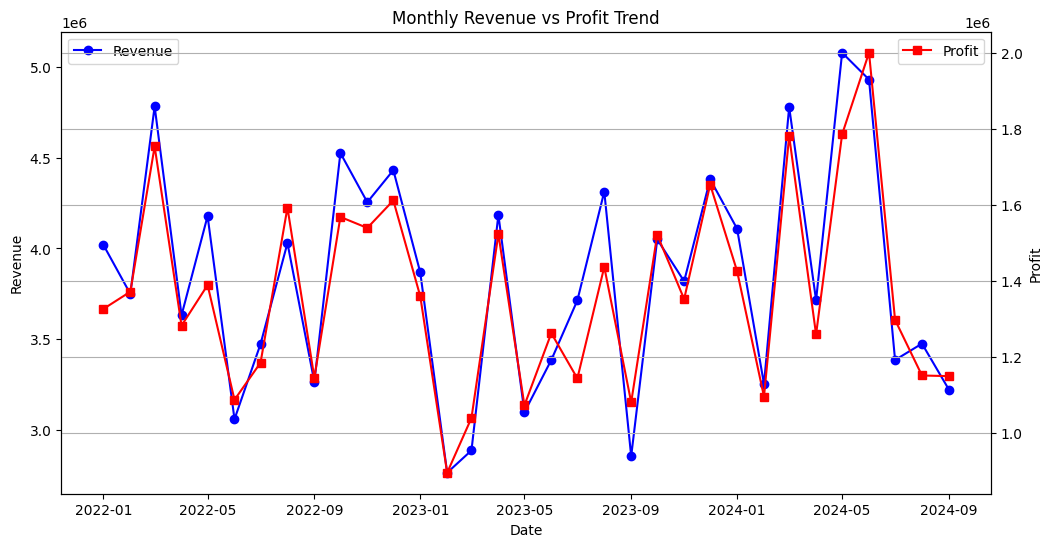

In [167]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly['Order_Date'], monthly['Revenue'], marker='o', label='Revenue' ,color = "blue" )
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(monthly['Order_Date'], monthly['Profit'], marker='s', label='Profit',color = 'Red' )
ax2.set_ylabel("Profit")
ax2.legend(loc='upper right')

plt.title("Monthly Revenue vs Profit Trend")
plt.grid(True)
plt.savefig("monthly_revenue_profit_trend.png" ,dpi = 300)
plt.show()



In [168]:
monthly['Rolling_Revenue'] = monthly['Revenue'].rolling(3).mean()
peak = monthly.loc[monthly['Revenue'].idxmax()]
display(peak)

,28
Order_Date,2024-05-01 00:00:00
Revenue,5076931
Profit,1786372.029952
Units_Sold,181
Revenue_Growth_%,36.663045
Month_Num,5
Rolling_Revenue,4523353.666667


In [169]:
mean_growth = monthly['Revenue_Growth_%'].mean()
std_growth = monthly['Revenue_Growth_%'].std()

future_growth = np.random.normal(mean_growth, std_growth, 6)

forecast = []
last_revenue = monthly['Revenue'].iloc[-1]

for g in future_growth:
    last_revenue *= (1 + g/100)
    forecast.append(last_revenue)

print('Forecast')
display(forecast)
print('Future_growth')
display(future_growth)
print('last_revenue')
display(last_revenue)
print('mean_growth')
display(mean_growth)
print('std_growth')
display(std_growth)

Forecast


[np.float64(3035469.163570747),
 np.float64(2838178.302361333),
 np.float64(1958446.6477379685),
 np.float64(2403165.6778695737),
 np.float64(2377740.871221221),
 np.float64(1620663.3783261196)]

Future_growth


array([ -5.83227944,  -6.49951789, -30.9963491 ,  22.70774293,
        -1.05797145, -31.84020185])

last_revenue


np.float64(1620663.3783261196)

mean_growth


np.float64(1.9374741353299796)

std_growth


23.653977007741496

# CHART 1 — Monthly Revenue Trend (Line)

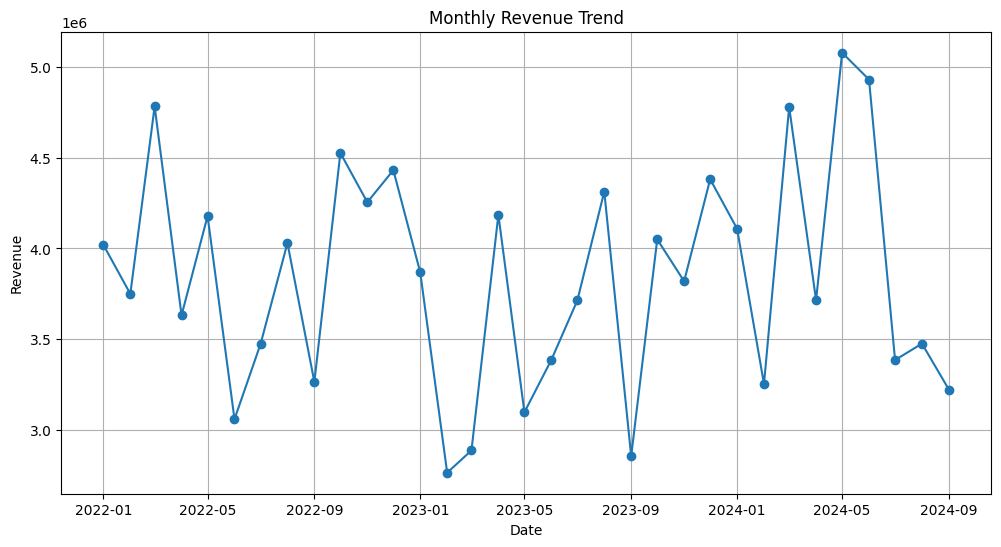

In [170]:
plt.figure(figsize=(12,6))
plt.plot(monthly['Order_Date'], monthly['Revenue'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.savefig("monthly_revenue_trend.png" ,dpi = 300)
plt.show()


#CHART 3 — Rolling Average Revenue (Trend Smoothing)

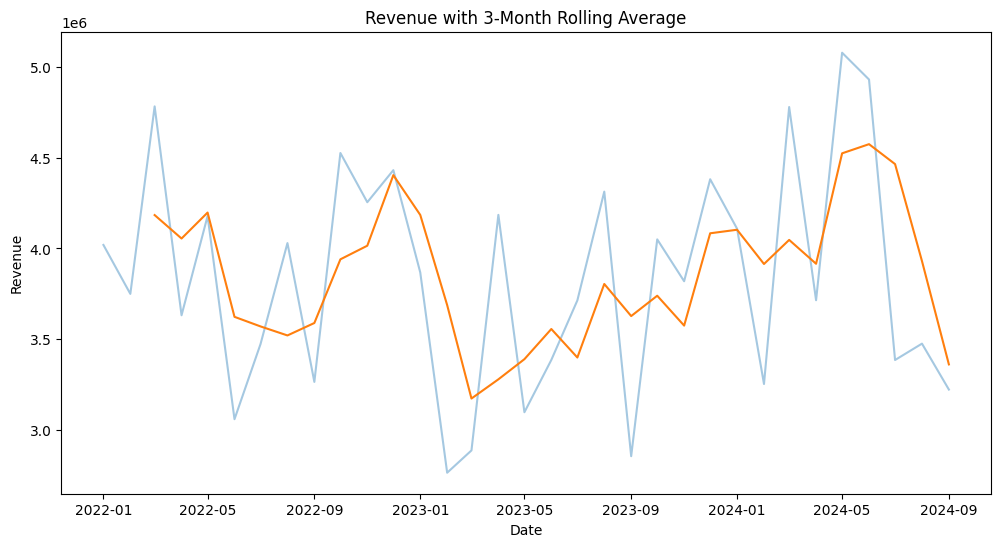

In [171]:
monthly['Rolling_Revenue'] = monthly['Revenue'].rolling(3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly['Order_Date'], monthly['Revenue'], alpha=0.4)
plt.plot(monthly['Order_Date'], monthly['Rolling_Revenue'])
plt.title("Revenue with 3-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.savefig("revenue_with_rolling_average.png" ,dpi = 300)
plt.show()


#CHART 4 — Product Revenue Contribution (Bar)

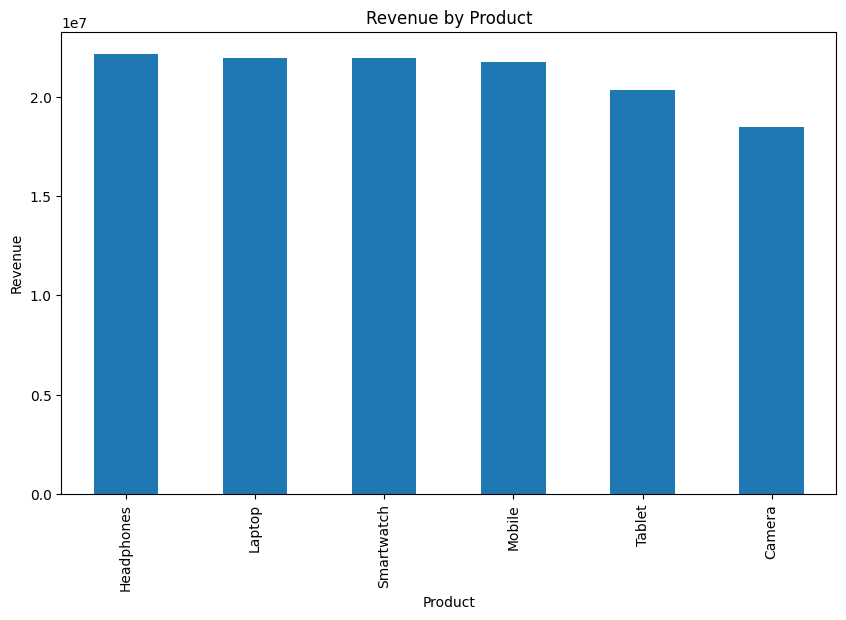

In [172]:
product_revenue = (
    df.groupby('Product')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
product_revenue.plot(kind='bar')
# plt.bar(product_revenue.index, product_revenue.values)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.savefig("revenue_by_product.png" ,dpi = 300)
plt.show()


#CHART 5 — Pareto Chart (80/20 Rule 🔥)

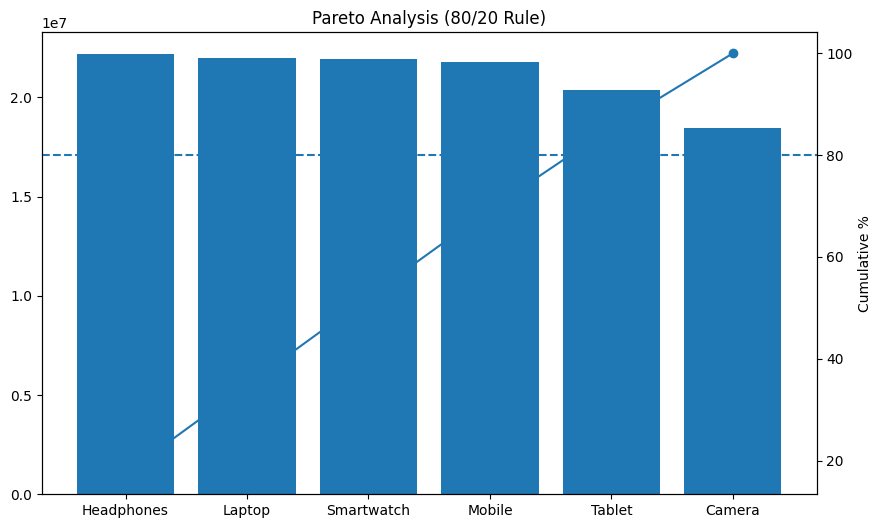

In [173]:
pareto = product_revenue.cumsum() / product_revenue.sum() * 100

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(product_revenue.index, product_revenue.values)
ax2 = ax1.twinx()
ax2.plot(product_revenue.index, pareto, marker='o')

ax2.axhline(80, linestyle='--')
ax2.set_ylabel("Cumulative %")

plt.title("Pareto Analysis (80/20 Rule)")
plt.savefig("pareto_analysis.png" ,dpi = 300)
plt.show()


#CHART 6 — Region-Wise Revenue Comparison

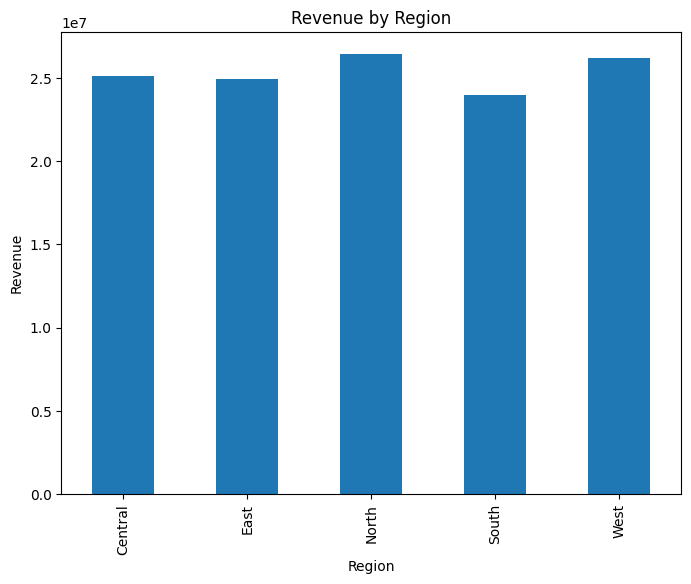

In [174]:
region_revenue = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(8,6))
region_revenue.plot(kind='bar')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.savefig("revenue_by_region.png" ,dpi = 300)
plt.show()


#CHART 7 — Customer Purchase Frequency (Histogram)

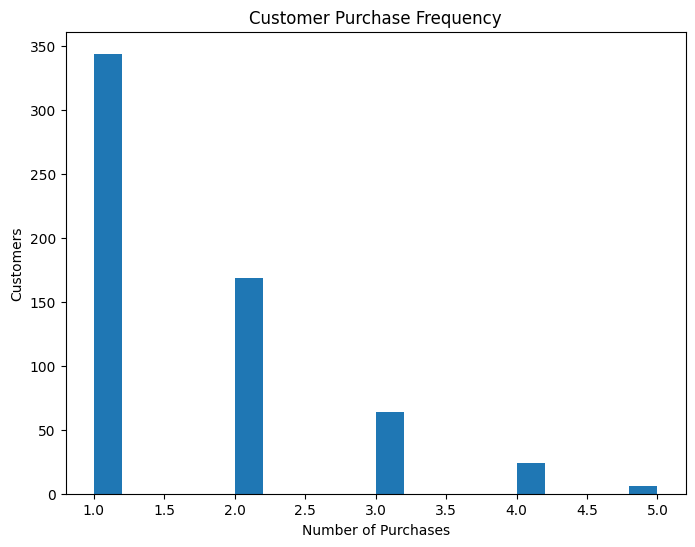

In [175]:
purchase_freq = df.groupby('Customer_ID').size()

plt.figure(figsize=(8,6))
plt.hist(purchase_freq, bins=20)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Customers")
plt.savefig("customer_purchase_frequency.png" ,dpi = 300)
plt.show()


#CHART 8 — Cohort Retention Heatmap (ADVANCED 🔥)

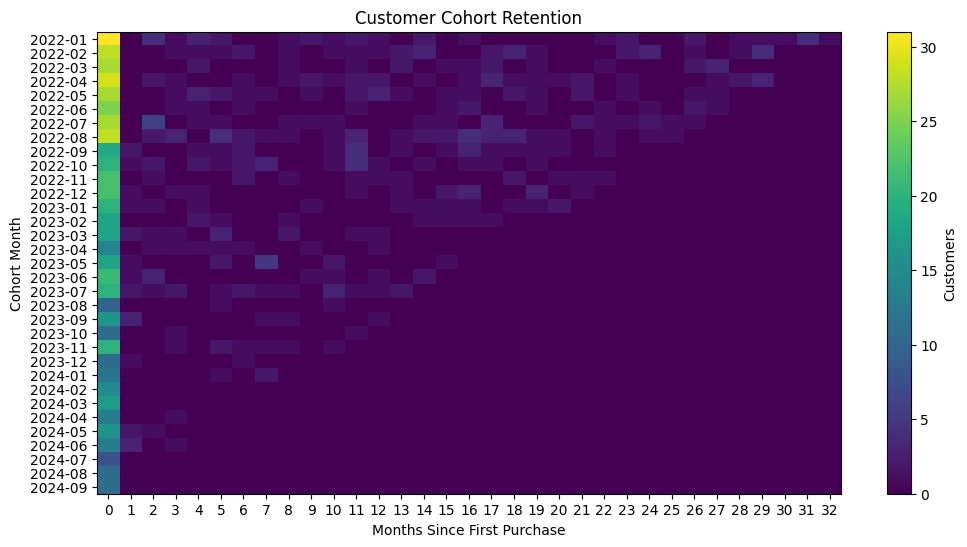

In [176]:
plt.figure(figsize=(12,6))
plt.imshow(cohort, aspect='auto')
plt.colorbar(label='Customers')
plt.title("Customer Cohort Retention")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")
plt.xticks(np.arange(len(cohort.columns)), cohort.columns)
plt.yticks(np.arange(len(cohort.index)), cohort.index)
plt.savefig("customer_cohort_retention.png" ,dpi = 300)
plt.show()

#CHART 9 — Revenue Volatility (Risk Analysis)

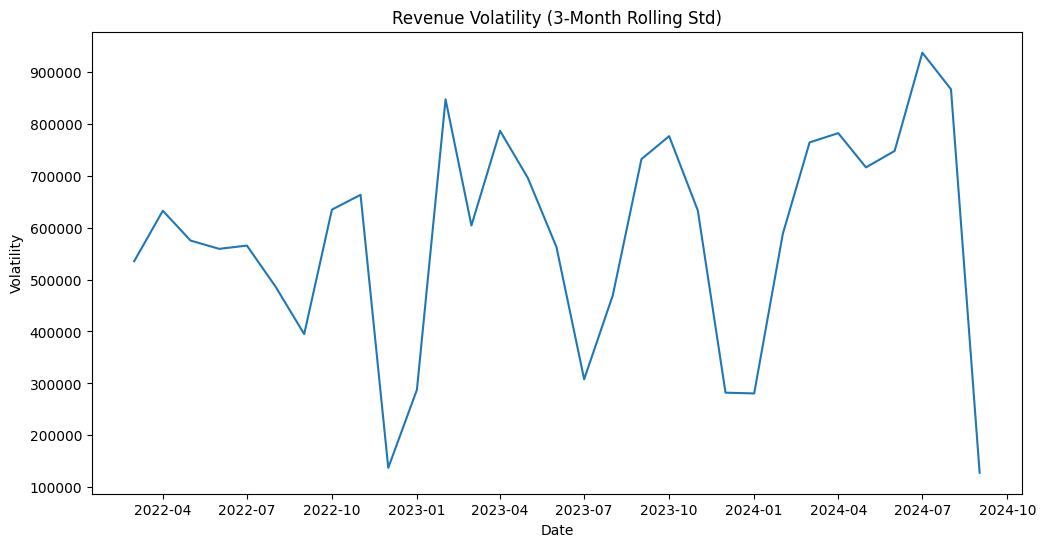

In [177]:
monthly['Revenue_Volatility'] = monthly['Revenue'].rolling(3).std()

plt.figure(figsize=(12,6))
plt.plot(monthly['Order_Date'], monthly['Revenue_Volatility'])
plt.title("Revenue Volatility (3-Month Rolling Std)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.savefig("revenue_volatility.png" ,dpi = 300)
plt.show()


#CHART 10 — Revenue Forecast (Simulation-Based)

/tmp/ipython-input-2858501902.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


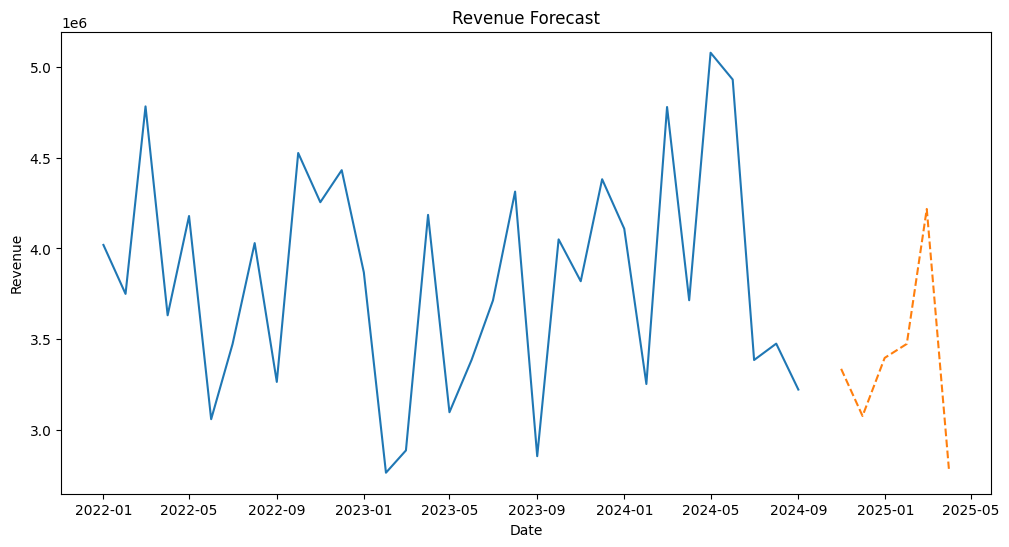

In [178]:
mean_growth = monthly['Revenue'].pct_change().mean()
std_growth = monthly['Revenue'].pct_change().std()

future_months = 6
forecast = []
last_value = monthly['Revenue'].iloc[-1]

for _ in range(future_months):
    last_value *= (1 + np.random.normal(mean_growth, std_growth))
    forecast.append(last_value)

future_dates = pd.date_range(
    monthly['Order_Date'].iloc[-1],
    periods=future_months+1,
    freq='M'
)[1:]

plt.figure(figsize=(12,6))
plt.plot(monthly['Order_Date'], monthly['Revenue'])
plt.plot(future_dates, forecast, linestyle='--')
plt.title("Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.savefig("revenue_forecast.png" ,dpi = 300)
plt.show()
